# Count the Number of Reads Per Chromosome by Cluster

In [33]:
# Imports
import os
import sys
from collections import defaultdict

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pysam import AlignmentFile

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb

# Setup notebook
nbconfig = Nb.setup_notebook()

# Turn on cache
from joblib import Memory
memory = Memory(cachedir=nbconfig.cache, verbose=0)


last updated: 2018-01-24 
Git hash: 021a2dcaf7567ddd8f5066951463bc7b33ec1142


In [31]:
cluster = pd.read_csv('../output/testes_scRNAseq_pilot/clusters.tsv', sep='\t')
lookup = cluster.ident.to_dict()

In [32]:
CHROMS = ['2L', '2R', '3L', '3R', '4', 'X', 'Y', 'M']

In [ ]:
dat = AlignmentFile('../output/testis1/outs/possorted_genome_bam.bam', 'rb')
results = defaultdict(lambda : defaultdict(int))

for read in dat.fetch():
    if read.is_unmapped:
        continue
    
    chrom = read.reference_name
    if chrom not in CHROMS:
        continue
   
    try:
        cell = read.get_tag('CB').replace('-1', '')
        clus = lookup[cell]
        results[clus][chrom] += 1
    except:
        pass

In [ ]:
results

defaultdict(<function __main__.<lambda>>,
            {0: defaultdict(int,
                         {'2L': 907574,
                          '2R': 1517804,
                          '3L': 869925,
                          '3R': 1163026,
                          '4': 32361,
                          'X': 1100369,
                          'Y': 47014}),
             1: defaultdict(int,
                         {'2L': 1169937,
                          '2R': 1654591,
                          '3L': 1166611,
                          '3R': 1530249,
                          '4': 53786,
                          'X': 1383970,
                          'Y': 37817}),
             2: defaultdict(int,
                         {'2L': 581639,
                          '2R': 762286,
                          '3L': 533779,
                          '3R': 733222,
                          '4': 30676,
                          'X': 712334,
                          'Y': 34379}),
             3: defa

In [47]:
import pandas as pd

In [50]:
df = pd.DataFrame(results)

In [53]:
df.index.name = 'chrom'

In [54]:
df.head()

,0,1,2,3,4,5,6
chrom,,,,,,,
2L,907574,1169937,581639,1065069,557208,583098,181675
2R,1517804,1654591,762286,1317426,511958,658855,276381
3L,869925,1166611,533779,949071,395541,539921,180757
3R,1163026,1530249,733222,1271795,588930,639529,222020
4,32361,53786,30676,56021,9863,31148,7906


In [59]:
melted = df.reset_index().melt(id_vars='chrom')
melted.columns = ['chrom', 'cluster', 'value']

In [60]:
melted.head()

,chrom,cluster,value
0,2L,0,907574
1,2R,0,1517804
2,3L,0,869925
3,3R,0,1163026
4,4,0,32361


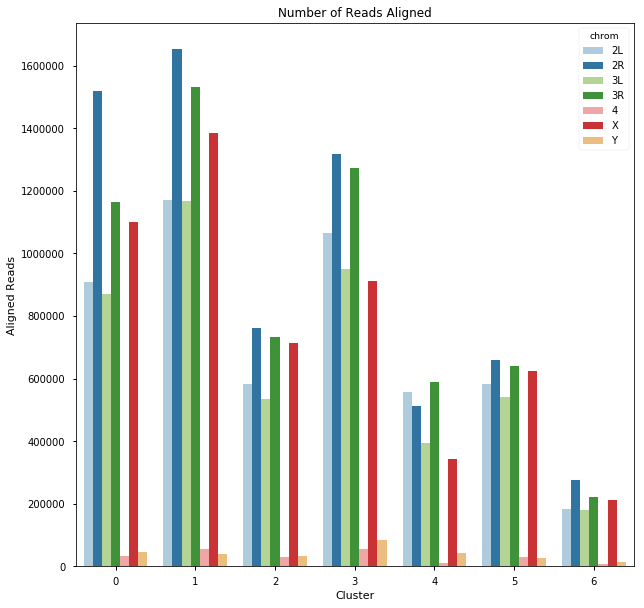

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x='cluster', y='value', hue='chrom', data=melted, ax=ax)
ax.set_title('Number of Reads Aligned')
ax.set_ylabel('Aligned Reads')
ax.set_xlabel('Cluster');